# HW 1 Part 2: Preprocessing Bank Marketing Dataset

The original dataset is available here: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
We have a modified subset of this dataset to practice data  preprocessing. 

Perform the following tasks on the provided bank marketing dataset (bank-hw1.csv contains the dataset and bank-names.txt contains the description of the original dataset). Complete all the LP questions to receive a "low pass" grade on the homework. Complete all the questions (both LP and HP) to receive a "high pass" grade on the homework. 

Note that if you are unable to complete any of the LP questions satisfactorily, you will receive a grade of "revision required". You can revise and resubmit your work in exchange for a token. Please review the syllabus for more information on specifications grading.

**VERY IMPORTANT**: Include **ALL** the references you used for this assignment, including names of classmates you discuss with. Failure to cite your sources counts as an act of academic dishonesty and will be taken seriously without zero tolerance. You will automatically receive a “fail” grade in the homework and further serious penalties may be imposed.

NOTE: You can look for help on the Internet but refrain from referencing too much. Please cite all your sources in your submission. 
When you submit your assignment, you automatically agree to the following statement. If you do not agree, it is your responsibility to provide the reason.

“*I affirm that I have neither given nor received unauthorized help in completing this homework. I am not aware of others receiving such help. I have cited all the sources in the solution file.*”

In [146]:
## Your code goes here. Import the csv into a pandas dataframe here
import pandas as pd
import numpy as np
data_frame=pd.read_csv("bank-hw1.csv")

[LP 1] Deal with the erroneous and missing values in the dataset. Below is necessary information about the columns that contain missing and erroneous values:

1. Age: must be in the range 18-100 
2. Job: case insensitive field, column contains clerical errors where extra dots or punctuations are left in the entries 
3. Marital: marital status is case insensitive; short forms of the entries refer to the same value (e.g., div is the same as divorced); there are typographical errors in the entries
4. Day and month: some entries have both these values combined in one column 
5. Duration: all entries must be non-negative

The set of possible values in each column and their meaning is provided in the bank-names.txt file. You can use the information to make decisions. Please explain your choices even if you only took a guess. 



In [ ]:
## Your code for LP 1 goes here. 

#For Age column:
data_frame['age'].loc[(data_frame['age']<18)]=18
data_frame['age'].loc[(data_frame['age']>100)]=100

# For Job:
data_frame['job'].loc[data_frame['job'].str.contains('\.',na=True)]=data_frame['job'].str.slice(0,-1)
data_frame['job']=data_frame['job'].str.replace(r'\W',"")


#For Marital:
data_frame['marital'] = data_frame['marital'].replace(['div','Div'],'divorced')
data_frame['marital'] = data_frame['marital'].replace(['M',"Married","maried","mairied","marirred"],'married')
data_frame['marital'] = data_frame['marital'].replace("Single",'single')
data_frame = data_frame[data_frame['marital']!='1']

#For day
data_frame=data_frame[data_frame['day'].str.len()<=2]

#For Month
data_frame['month'] = data_frame['month'].replace(['August','august'],'aug')
data_frame=data_frame[~data_frame['month'].isin(['27-Aug','8-Aug'])]

#For Duration:
data_frame['duration'][data_frame['duration']<0]=0

#For Balance
data_frame['balance'][data_frame['balance']<0]=0


[LP 2] Use encoders and convert the categorical variables to numerical values.

[HP 1] Describe your choice of encoder for these columns and explain why they are appropriate for the column.


In [148]:
## Your code for LP 2 goes here. 

#Encoding Job Column
data_frame=data_frame[data_frame['job'].notna()]
data_frame=data_frame[data_frame['job']!='unknown']

from sklearn.preprocessing import LabelEncoder
encoder2 = LabelEncoder()
data_frame['ENCODED_JOB'] = encoder2.fit_transform(data_frame['job'])

#Encoding marital column:
data_frame['ENCODED_MARITAL'] = encoder2.fit_transform(data_frame['marital'])

#Encoded education column:
data_frame=data_frame[data_frame['education'].notna()]
Educational_dict = {'primary' : 1,'secondary' : 2,'tertiary' :3}
data_frame['ENCODED_EDUCATION'] = data_frame['education'].map(Educational_dict)

#Encoding default column:
from sklearn.preprocessing import LabelBinarizer
encoder1 = LabelBinarizer()
data_frame['ENCODED_DEFAULT']=encoder1.fit_transform(data_frame['default'].values.reshape(-1,1))

#Encoding housing column:
data_frame['ENCODED_HOUSING']=encoder1.fit_transform(data_frame['housing'].values.reshape(-1,1))

#Encoding Contact column:
data_frame['ENCODED_CONTACT'] = encoder2.fit_transform(data_frame['contact'])

#Encoding P_outcome
data_frame['ENCODED_POUTCOME'] = encoder2.fit_transform(data_frame['poutcome'])

#Encodin months
months_dict = {'jan' : 1,'feb' : 2,'mar' :3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
data_frame['ENCODED_MONTHS'] = data_frame['month'].map(months_dict)


#Encodin y
data_frame['ENCODED_Y']=encoder1.fit_transform(data_frame['y'].values.reshape(-1,1))

< Your answer for HP 1 goes here >

1) Column 'Job':
Encoder Used : LabelEncode
Reason: In the given column there are 11 unique values, for all these values 11 unique numbers are assigned and because of this relation among them is not violated.

2) Colum marital:
Encoder Used : LabelEncode
Reason: In the given column there are 3 unique values, for all these values 3 unique numbers are assigned and because of this relation among them is not violated.

3) Education column:
This column has three different field 'primary','secondary','tertiary' for all these value based on their level concurent ranking is given so that ordinal meaning is not currupted.

4) Default Column:
Encoder:LabelBinarizer
This column containd only two vales, yes and no. If we use any binary encoding technique like LabelBinarizer we can generate binary values which satisfies or requiremnt.

5) Housing Column:
Encoder:LabelBinarizer
This column containd only two vales, yes and no. If we use any binary encoding technique like LabelBinarizer we can generate binary values which satisfies or requiremnt.

6) Encoded Contact:
Encoder: LabelEncode
Reason: In the given column there are 3 unique values, for all these values 3 unique numbers are assigned and because of this relation among them is not violated.

7) Encoded Poutcome:
Encoder: LabelEncode
Reason: In the given column there are 3 unique values, for all these values 3 unique numbers are assigned and because of this relation among them is not violated.

8) Encoded month:
Starting from 1 every month is given its corresponding integer value.

9) Encoding Y:
LabelBinarizer
This column containd only two vales, yes and no. If we use any binary encoding technique like LabelBinarizer we can generate binary values which satisfies or requiremnt.


[LP 3] Use an appropriate scaler to scale the numerical values to a suitable range of values. Briefly explain the process you used.

In [149]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler(feature_range=(5, 10))
data_frame[['age','balance','day','duration','ENCODED_JOB','ENCODED_MARITAL','ENCODED_EDUCATION','ENCODED_DEFAULT','ENCODED_HOUSING','ENCODED_CONTACT','ENCODED_POUTCOME','ENCODED_MONTHS','ENCODED_Y']]=min_max.fit_transform(data_frame[['age','balance','day','duration','ENCODED_JOB','ENCODED_MARITAL','ENCODED_EDUCATION','ENCODED_DEFAULT','ENCODED_HOUSING','ENCODED_CONTACT','ENCODED_POUTCOME','ENCODED_MONTHS','ENCODED_Y']])


Save your clean dataset in a file called **bank_clean.csv**. Submit this file along with the ipynb solution file. 

In [150]:
## Your code to save the dataframe to a csv file goes here. 
data_frame.to_csv("Bank_cleaned_data.csv")

[HP 2] After cleaning the data, are there any columns that seem redundant or unnecessary? If there is a particular business outcome for which a column might be unnecessary, please state it here.

> Indented block




< Your answer for HP 2 goes here >
1) Contact: Contact communication type, this attribute doesn't hold any logic significance in building the model or any prediction.

2)Education:The type of the degree our customer hold will have less significane in building a model.

3) Day: We already have duration colum through which can identify the numnber of days so this column might not have much significance.

4) Month: As we have duration column through which we can identify the last contacted month, this column will have less significane.

[HP 3] What is the average duration of calls made in the month of November? Plot a histogram of call duration in the month of November.

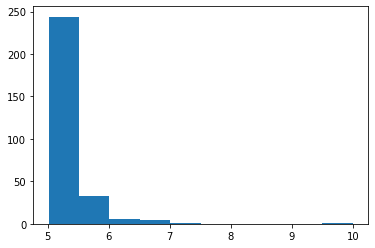

5.394190602658971

In [151]:
## Your code for HP 3 goes here. 
import matplotlib.pyplot as plt
import numpy as np

x = data_frame['duration'][data_frame['month']=='aug']

plt.hist(x)
plt.show() 



data_frame['duration'].mean()


[HP 4] How many times on an average were customers whose "poutcome" was "success" contacted previously ("previous" column contains this information)? How does this compare to the customers whose "poutcome" was "failure" or "other"? What insight does this step provide?

In [152]:
## Your code for HP 4 goes here. 
##customers with pout ='success' and previous >0

success_data=data_frame['previous'][(data_frame['poutcome']=='success') & data_frame['previous']>0]

#round(success_data.mean()) #Average time customer was contacted was 3

round(data_frame['previous'][(data_frame['poutcome']=='unknown') & data_frame['previous']>0].mean()) #7

#Insights:
#1)On an average customers were contacted 3 times previously for whom the poutcome is success.

#2) On an average customers were contacted 3 times previously for whom the poutcome is Failure.

#3) For the customers whose outcome is "unknown" they were contacted 7 times previously.

#4) From this insights we can observe that the customer's whose poutcome is succees or failure were contacted 3 time on an average.



7

# References
https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.hist.html

Note: I had few discussions with one of my classmate Sai Varshith Talluri[SSID:015952586].

# What to turn in:
1. The ipynb solution file, which includes the references
2. If you use Colab or GitHub for version control, please share a link to your notebook or GitHub repository
3. The bank_clean.csv file

